In [10]:
from Bucket import Bucket
import os
import json

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [68]:
bucket_path = '../private/result-buckets/'
grade_vs_salary = '../private/grade-vs-salary.json'
grade_vs_attendance = '../private/grade-vs-attendance.json'
TERM = ['1a', '1b', '2a', '2b', '3a', '3b', '4a']

In [69]:
def process_file(filename):
    with open(bucket_path + filename, 'r') as f:
        f = json.loads(f.read())
        b = Bucket.create_from_bucket(filename.replace('_buckets.json', ''), f)
        render_file(b)

In [70]:
def render_file(b):
    fig = plt.figure(figsize=(18, 16))    
    
    ax1 = fig.add_subplot(211)
    cols = []
    for val in b:
        if type(b[val]) == dict and 'message' in b[val]:
            continue
        cols.append(val)
        salaries = []

        salaries = [s.mean() for s in b[val].salaries]
        ax1.plot([1, 2, 3, 4, 5, 6], salaries) # add 7 for term
    ax1.legend(cols, loc='upper left')
    plt.show()

In [71]:
for i in os.listdir(bucket_path):
    if i.startswith('.'):
        continue
#    process_file(i)

In [72]:
def render_grade_vs_salary(data, term, axis='cumulative_avg'):
    """Creates a scatter plot of the data of a term.
    
    `axis` represents the x axis that's plotted against salary.
    """
    x = []
    y = []
    for salary in data:
        for item in data[salary]:
            x.append(item[axis])
            y.append(item['result_salary'])
    plt.xlim(60, 100)
    plt.scatter(x, y)
    print('Term: ' + term)
    print(np.corrcoef(x, y)[0, 1])
    plt.show()

Term: 1
0.2364562021650012


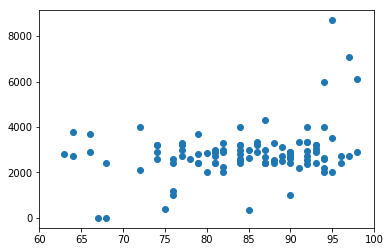

Term: 2
0.23161596874707194


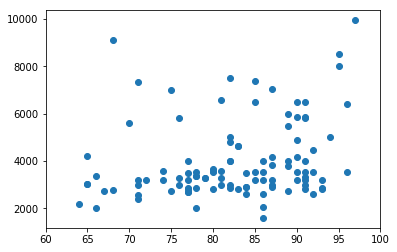

Term: 3
0.18636222829213395


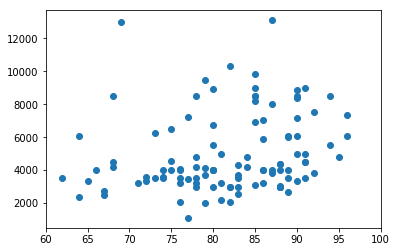

Term: 4
0.09514875558789497


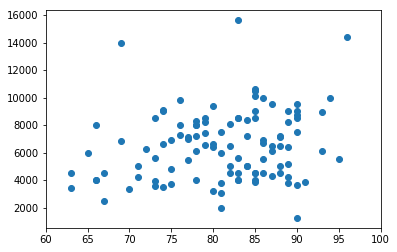

Term: 5
0.18395857015444955


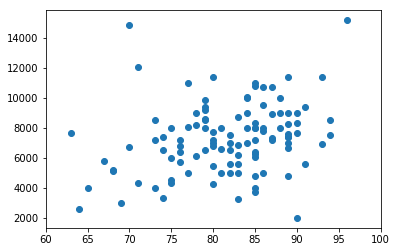

Term: 6
-0.05676787581307533


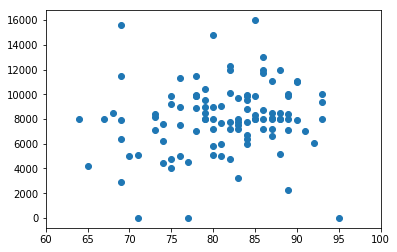

In [73]:
with open(grade_vs_salary, 'r') as f:
    data = json.loads(f.read())
    for term in range(1, len(data)+1):
        render_grade_vs_salary(data[str(term)], str(term))

In [188]:
from scipy.interpolate import interp1d
import math

In [244]:
def render_grade_vs_attendance(data, term):
    x = []
    y = []
    legend = []
    max_val = []
    for i in range(1, 5):
        rating = data.get(str(i), [])
        grades = [0] * 6
        for g in rating:
            if g < 60 or g == 'exchange':
                continue
            index = int(math.floor((float(g) - 60) / (40.0 / 6))) # Normalize to range 0-7
            grades[index] += 1
        if sum(grades) < 5:
            continue
        legend.append(i)
        grades = list(map(lambda x: float(x) / sum(grades) * 100, grades))

        x = [num for num in range(60, 100, 7)]
        print len(x), len(grades)
        print grades, x
        f = interp1d(x, grades, kind='cubic', fill_value='extrapolate')
        xnew = np.linspace(63, 100, num=40)
        max_val.append(max(f(xnew)))
        plt.plot(xnew, f(xnew))
        
    plt.xlim(60, 100)
    plt.ylim(0, 60)
    plt.legend(legend)
    plt.show()

6 6
[5.88235294117647, 5.88235294117647, 17.647058823529413, 23.52941176470588, 35.294117647058826, 11.76470588235294] [60, 67, 74, 81, 88, 95]
6 6
[3.3707865168539324, 7.865168539325842, 16.853932584269664, 26.96629213483146, 31.46067415730337, 13.48314606741573] [60, 67, 74, 81, 88, 95]


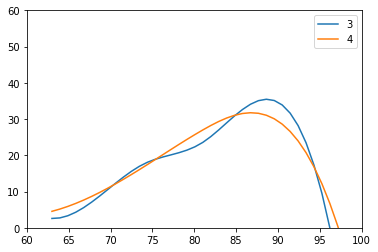

6 6
[0.0, 16.666666666666664, 50.0, 0.0, 16.666666666666664, 16.666666666666664] [60, 67, 74, 81, 88, 95]
6 6
[12.5, 0.0, 25.0, 25.0, 31.25, 6.25] [60, 67, 74, 81, 88, 95]
6 6
[3.3333333333333335, 26.666666666666668, 16.666666666666664, 30.0, 20.0, 3.3333333333333335] [60, 67, 74, 81, 88, 95]
6 6
[3.571428571428571, 12.5, 17.857142857142858, 30.357142857142854, 28.57142857142857, 7.142857142857142] [60, 67, 74, 81, 88, 95]


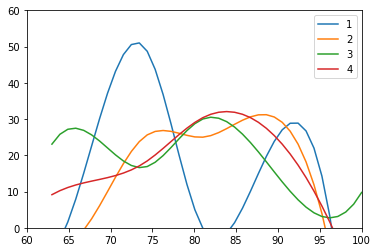

6 6
[0.0, 15.789473684210526, 31.57894736842105, 26.31578947368421, 21.052631578947366, 5.263157894736842] [60, 67, 74, 81, 88, 95]
6 6
[8.0, 12.0, 22.0, 26.0, 26.0, 6.0] [60, 67, 74, 81, 88, 95]
6 6
[2.7027027027027026, 8.108108108108109, 13.513513513513514, 40.54054054054054, 32.432432432432435, 2.7027027027027026] [60, 67, 74, 81, 88, 95]


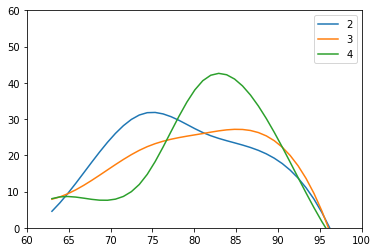

6 6
[15.384615384615385, 7.6923076923076925, 26.923076923076923, 26.923076923076923, 19.230769230769234, 3.8461538461538463] [60, 67, 74, 81, 88, 95]
6 6
[6.25, 8.333333333333332, 20.833333333333336, 41.66666666666667, 22.916666666666664, 0.0] [60, 67, 74, 81, 88, 95]
6 6
[6.25, 15.625, 34.375, 28.125, 15.625, 0.0] [60, 67, 74, 81, 88, 95]


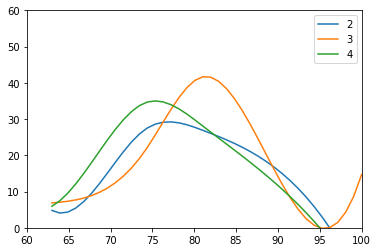

6 6
[0.0, 0.0, 20.0, 40.0, 40.0, 0.0] [60, 67, 74, 81, 88, 95]
6 6
[3.7037037037037033, 7.4074074074074066, 7.4074074074074066, 37.03703703703704, 33.33333333333333, 11.11111111111111] [60, 67, 74, 81, 88, 95]
6 6
[6.666666666666667, 2.2222222222222223, 22.22222222222222, 35.55555555555556, 31.11111111111111, 2.2222222222222223] [60, 67, 74, 81, 88, 95]
6 6
[0.0, 8.333333333333332, 12.5, 41.66666666666667, 33.33333333333333, 4.166666666666666] [60, 67, 74, 81, 88, 95]


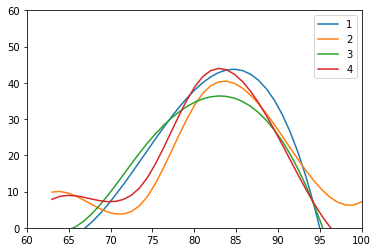

6 6
[0.0, 17.391304347826086, 21.73913043478261, 39.130434782608695, 21.73913043478261, 0.0] [60, 67, 74, 81, 88, 95]
6 6
[0.0, 16.0, 28.000000000000004, 36.0, 16.0, 4.0] [60, 67, 74, 81, 88, 95]
6 6
[2.3255813953488373, 16.27906976744186, 27.906976744186046, 32.55813953488372, 20.930232558139537, 0.0] [60, 67, 74, 81, 88, 95]
6 6
[0.0, 13.333333333333334, 40.0, 26.666666666666668, 20.0, 0.0] [60, 67, 74, 81, 88, 95]


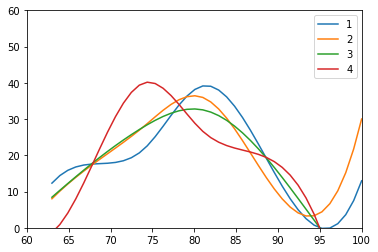

6 6
[0.0, 3.8461538461538463, 11.538461538461538, 46.15384615384615, 38.46153846153847, 0.0] [60, 67, 74, 81, 88, 95]
6 6
[0.0, 5.263157894736842, 5.263157894736842, 52.63157894736842, 36.84210526315789, 0.0] [60, 67, 74, 81, 88, 95]
6 6
[2.0408163265306123, 4.081632653061225, 18.367346938775512, 48.97959183673469, 22.448979591836736, 4.081632653061225] [60, 67, 74, 81, 88, 95]
6 6
[0.0, 5.88235294117647, 23.52941176470588, 41.17647058823529, 23.52941176470588, 5.88235294117647] [60, 67, 74, 81, 88, 95]


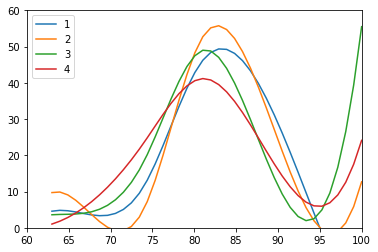

In [245]:
with open(grade_vs_attendance, 'r') as f:
    data = json.loads(f.read())
    for t in TERM:
        render_grade_vs_attendance(data[t], t)